# Import packages

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import learning_curve, train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_recall_curve 

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import time

# Import data

In [2]:
#import the dataset
income = pd.read_csv("adult.csv")

In [3]:
income

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
#describe the dataset
income.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
income.shape

(48842, 15)

# Data cleaning

## check missing data

In [7]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
#replace '?' with np.NaN to check the missing data
income = income.replace('?', np.NaN)

In [9]:
#count the missing data
income.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

<AxesSubplot:>

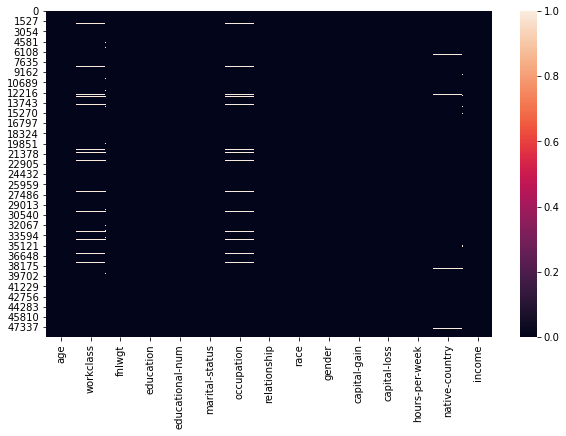

In [10]:
#plotting of Null variable
plt.figure(figsize=(10,6))
sns.heatmap(income.isnull())

## Fill missing data

In [11]:
#Fill null variable 
var = income['native-country'].mode()[0]
income['native-country'] = income['native-country'].replace(np.NaN,var)

var1 = income.workclass.mode()[0]
income.workclass = income.workclass.replace(np.NaN, var1)

var2 = income.occupation.mode()[0]
income.occupation = income.occupation.replace(np.NaN,var2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


<AxesSubplot:>

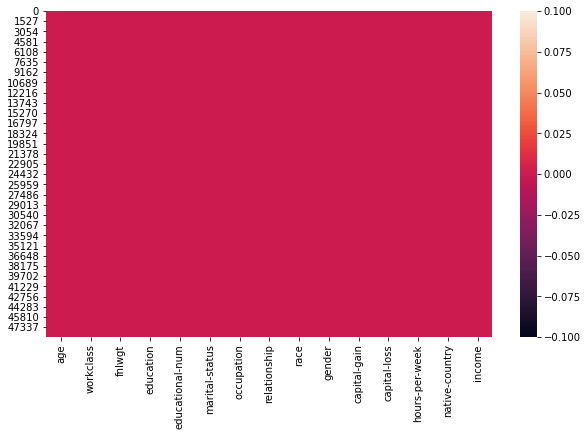

In [12]:
#again check there is null value or not
print(list(income.isnull().sum()))
plt.figure(figsize=(10,6))
sns.heatmap(income.isnull())


In [13]:
income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


# Data processing

In [14]:
#mapping the data into numerical data
income['income']=income['income'].map({'<=50K': 0, '>50K': 1})

In [15]:
income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


In [16]:
#Deleting redundant columns
del income['educational-num']

In [17]:
income.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


In [18]:
income.income.sum() / len(income.income)

0.23928176569346055

Propotion of classes (0 : 1) 0.7607182343065395 : 0.23928176569346055


/opt/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='income', ylabel='count'>

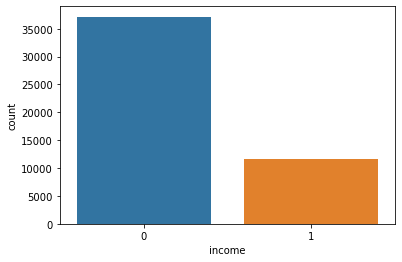

In [19]:
propotion = income.income.sum() / len(income.income)
print('Propotion of classes (0 : 1)', 1- propotion, ':', propotion)
sns.countplot(income.income)

In [20]:
print(income.income[income.income == 1].count())
print(income.income[income.income == 0].count())

11687
37155


# Feature engineering

In [21]:
categorical_columns = income.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')


In [22]:
#def categorical_encoding (label encodeing or one-hot encoding)
def categorical_encoding(df, categorical_cloumns, encoding_method):
    if encoding_method == 'label':
        encoder = LabelEncoder()
        encoded = df[categorical_cloumns].apply(encoder.fit_transform)
        return encoded
    elif encoding_method == 'one-hot':
        encoded = pd.DataFrame()
        for feature in categorical_cloumns:
            dummies = pd.get_dummies(df[feature], prefix=feature)
            encoded = pd.concat([encoded, dummies], axis=1)
        return encoded

In [23]:
encoded = categorical_encoding(income, categorical_cloumns=categorical_columns, encoding_method='label')

In [24]:
encoded.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,3,1,4,6,3,2,1,38
1,3,11,2,4,0,4,1,38
2,1,7,2,10,0,4,1,38
3,3,15,2,6,0,2,1,38
4,3,15,4,9,3,4,0,38


In [25]:
income = income.drop(columns=categorical_columns, axis=1)
income = pd.concat([income, encoded], axis=1)

In [26]:
income.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,income,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,25,226802,0,0,40,0,3,1,4,6,3,2,1,38
1,38,89814,0,0,50,0,3,11,2,4,0,4,1,38
2,28,336951,0,0,40,1,1,7,2,10,0,4,1,38
3,44,160323,7688,0,40,1,3,15,2,6,0,2,1,38
4,18,103497,0,0,30,0,3,15,4,9,3,4,0,38


# Data visualization

<AxesSubplot:title={'center':'correlation plot'}>

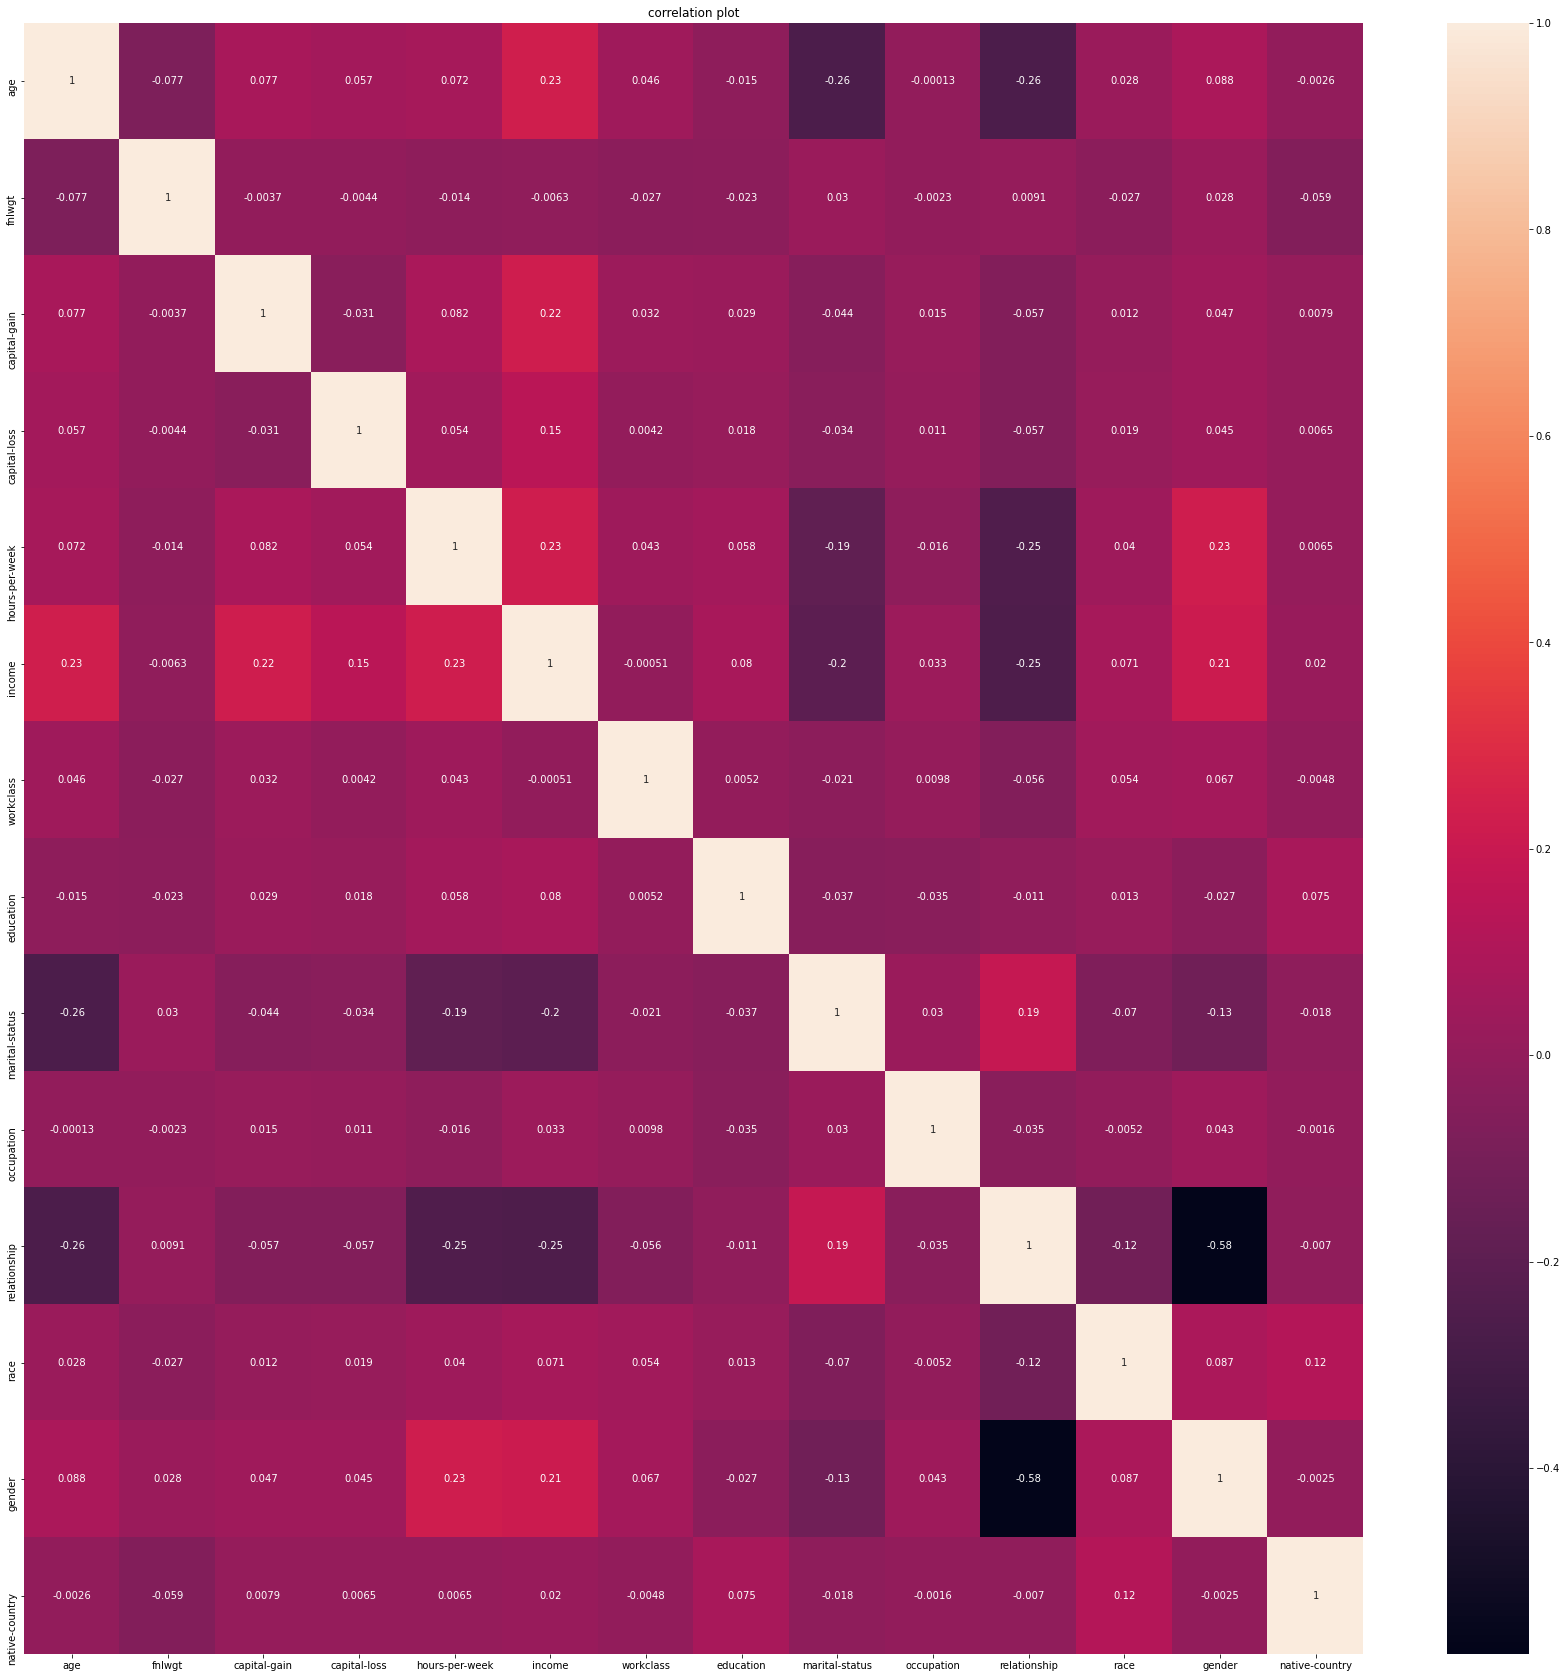

In [27]:
#use the heatmap to see the correlation between each attributes and output
corr = income.corr()
plt.figure(figsize=(30, 30))
plt.title('correlation plot')
sns.heatmap(corr, annot=True)

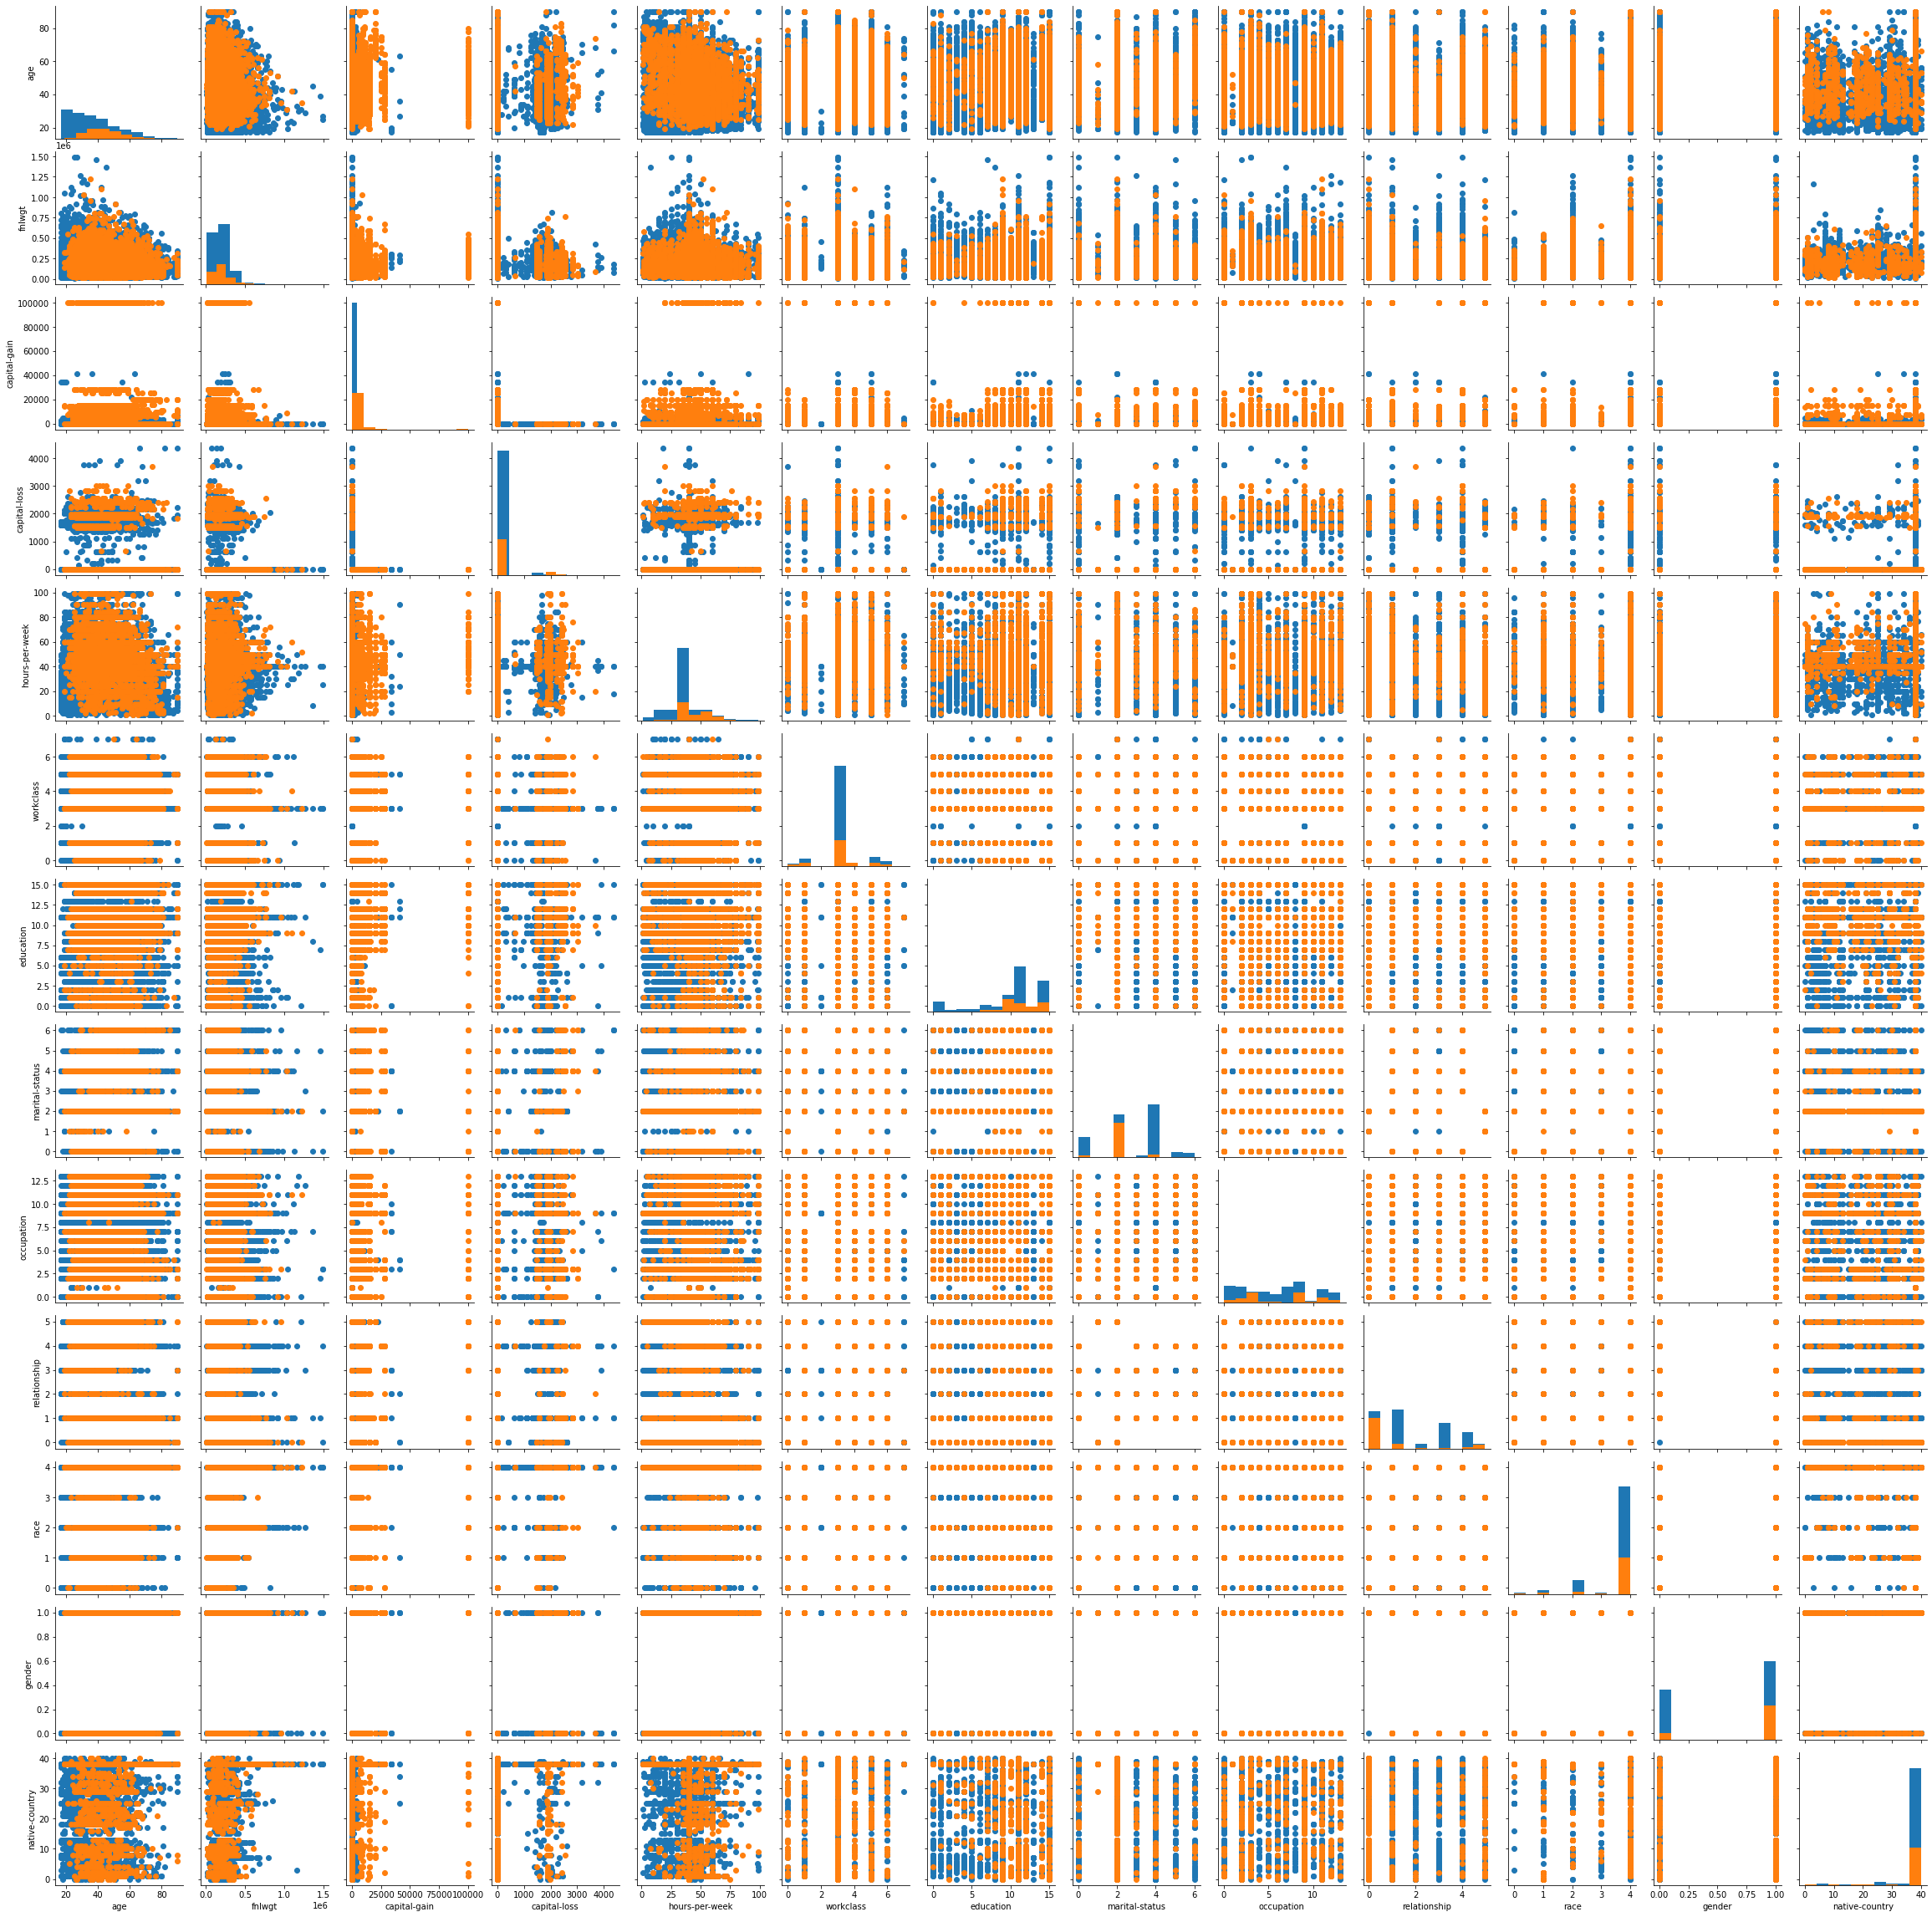

In [28]:
#use the PairGrid to see the relationship between each attributes and output
g=sns.PairGrid(income,hue='income')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

<AxesSubplot:xlabel='education', ylabel='count'>

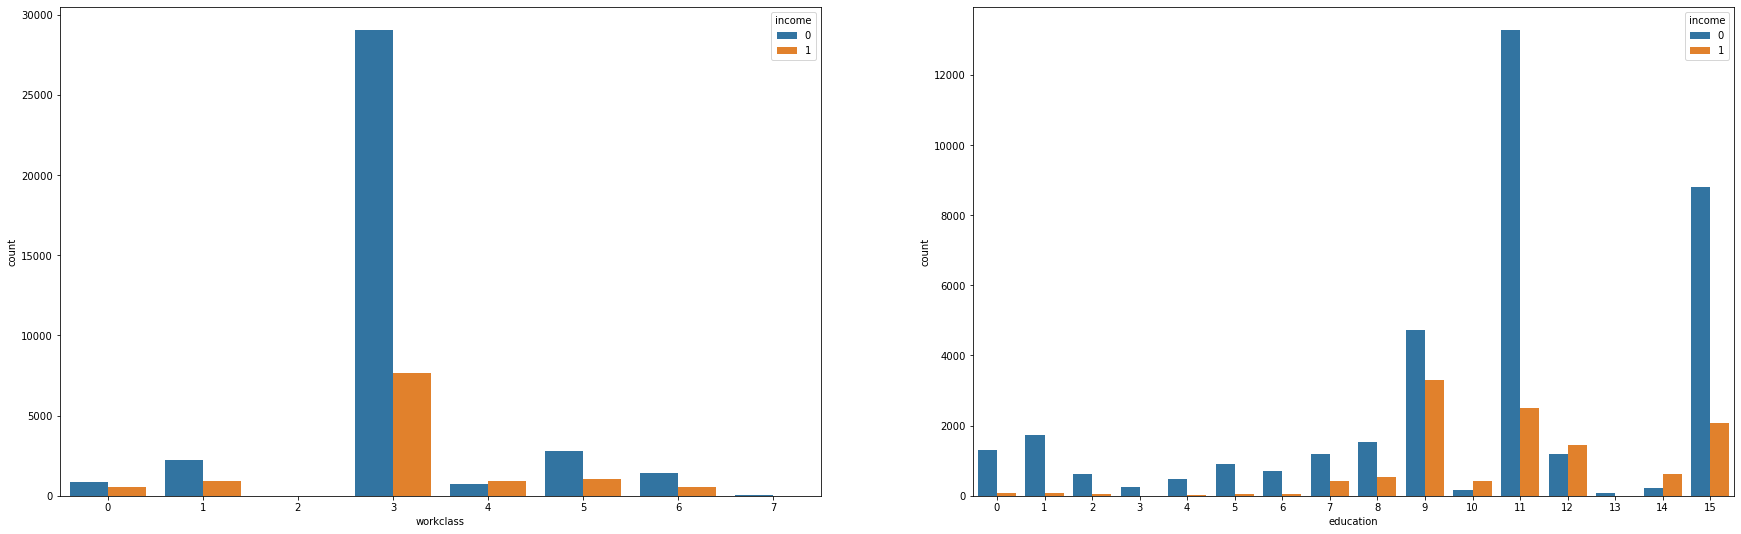

In [29]:
#Relationships between income and attributes respectively
a4_dims = (30, 9)
fig, ax = plt.subplots(figsize=a4_dims,ncols=2)
sns.countplot(x='workclass',hue='income',data=income,ax=ax[0])
sns.countplot(x='education',hue='income',data=income,ax=ax[1])

<AxesSubplot:xlabel='occupation', ylabel='count'>

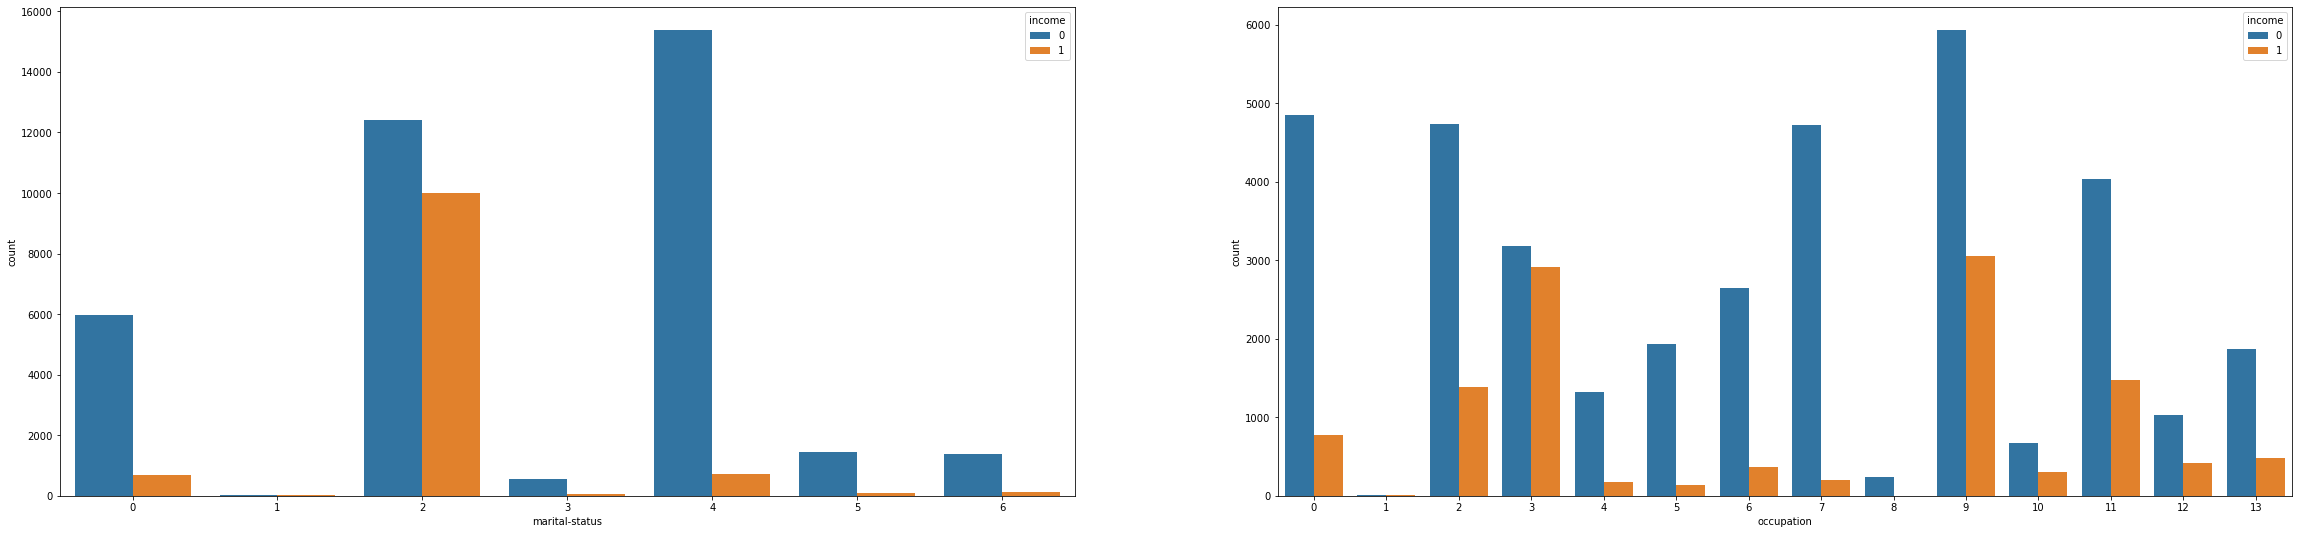

In [30]:
a4_dims = (40, 9)
fig, ax = plt.subplots(figsize=a4_dims,ncols=2)
sns.countplot(x='marital-status',hue='income', data=income,ax=ax[0])
sns.countplot(x='occupation',hue='income', data=income,ax=ax[1])

<AxesSubplot:xlabel='race', ylabel='count'>

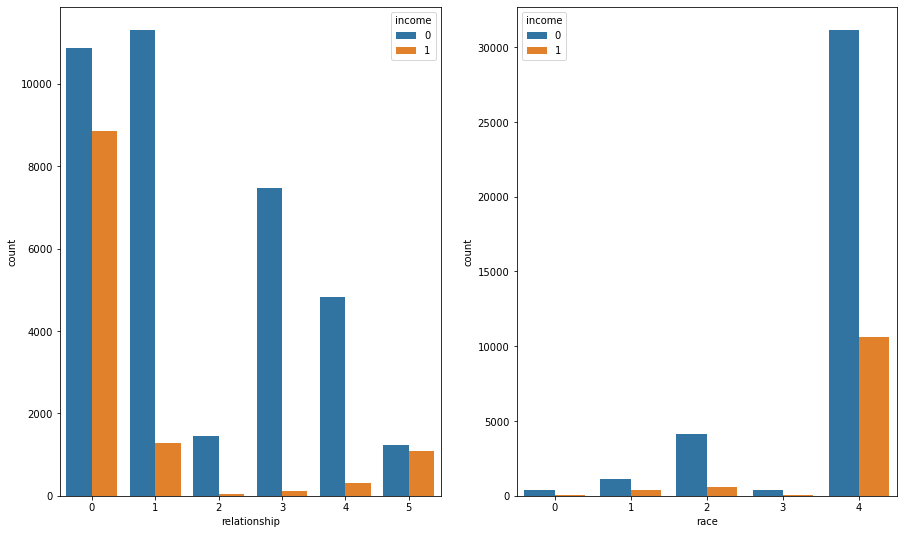

In [31]:
a4_dims = (15, 9)
fig, ax = plt.subplots(figsize=a4_dims,ncols=2)
sns.countplot(x='relationship',hue='income', data=income,ax=ax[0])
sns.countplot(x='race',hue='income', data=income,ax=ax[1])

<AxesSubplot:xlabel='income', ylabel='age'>

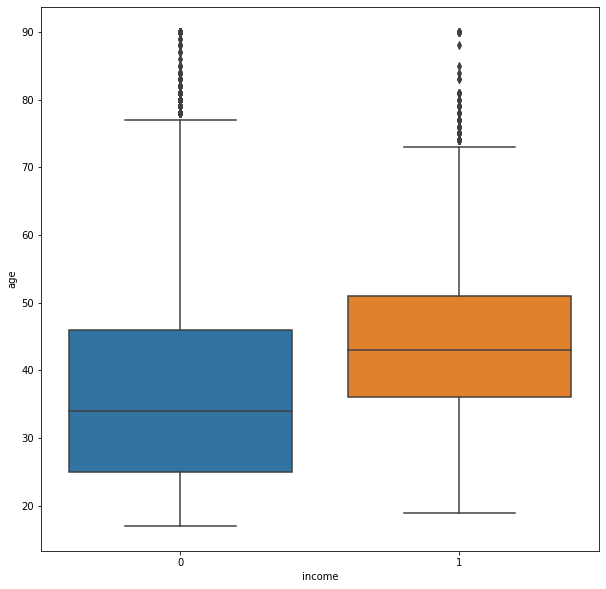

In [32]:
#The box plot gives the age group where the concentration of population is there when the income is >50k the age group is 35-52 years.is <=50k the age group is 25-45 years.
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="age", data=income)

# One-hot encoding

In [33]:
encoded = categorical_encoding(income, categorical_cloumns=categorical_columns, encoding_method='one-hot')

In [34]:
encoded.head()

,workclass_0,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_0,education_1,...,native-country_31,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
income = income.drop(columns=categorical_columns, axis=1)
income = pd.concat([income, encoded], axis=1)

In [51]:
income.head()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,income,workclass_0,workclass_1,workclass_2,workclass_3,...,native-country_31,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40
0,25,226802,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,0,0,50,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,0,0,40,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,7688,0,40,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,0,0,30,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


# Data balance

/opt/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='income', ylabel='count'>

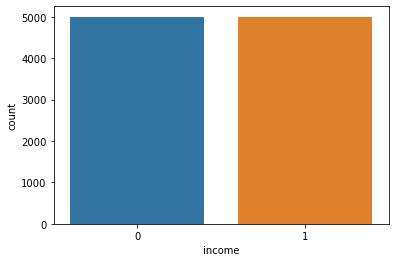

In [52]:
#randomly selected 10k data with the certain proportion of output
income_0 = income[income['income'] == 0]
income_1 = income[income['income'] == 1]
income_balanced  =income_0.sample(n=5000, random_state=42)
income_balanced = income_balanced.append(income_1.sample(n=5000, random_state=42))
sns.countplot(income_balanced['income'])

In [53]:
income_balanced = income_balanced.sort_index(ascending=True) 
income_balanced

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,income,workclass_0,workclass_1,workclass_2,workclass_3,...,native-country_31,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40
2,28,336951,0,0,40,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6,29,227026,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
10,65,184454,6418,0,40,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
21,34,238588,0,0,35,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
25,45,432824,7298,0,90,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48814,54,337992,0,0,50,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
48819,38,139180,15020,0,45,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48820,71,287372,0,0,10,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48833,43,84661,0,0,45,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


# Splitting data into training and test data

In [54]:
X=income_balanced.drop(["income"],axis=1)
y=income_balanced["income"]

In [55]:
y

2        1
6        0
10       1
21       0
25       1
        ..
48814    1
48819    1
48820    1
48833    0
48838    1
Name: income, Length: 10000, dtype: int64

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify = y)

In [57]:
X_train

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,workclass_0,workclass_1,workclass_2,workclass_3,workclass_4,...,native-country_31,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40
18055,49,169818,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
24102,21,275421,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
27623,23,209483,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
16137,41,190910,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4649,34,301251,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17793,37,217054,0,0,35,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
16490,17,65368,0,0,12,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
41365,29,160786,0,0,35,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
35617,46,111163,0,0,38,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Naive Bayes

# GaussianNB

In [58]:
modelG = GaussianNB()
modelG.fit(X_train, y_train);

In [59]:
#perform cross-validation to see how well this model does on classsification
from sklearn.model_selection import cross_val_score, train_test_split

In [60]:
#accrancy for taining data by cross validation
scores = cross_val_score(modelG, X_train, y_train, cv=10)
scores.mean()

0.6279999999999999

In [61]:
#we train the model on the training data only, and make predictions for the test data only to see how good its predictions are
predictionsG = modelG.predict(X_test)

In [62]:
#accyrancy for testing data, use the model to compare the true y and prediction y.
accuracy_score(y_test, predictionsG)

0.619

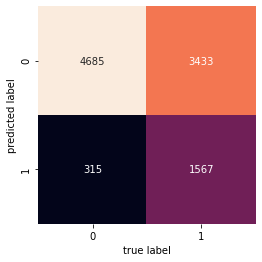

In [63]:
mat = confusion_matrix(y, modelG.predict(X))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=modelG.classes_, yticklabels=modelG.classes_)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [64]:
%%timeit
modelG.fit(X_train,y_train)

20.2 ms ± 2.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [65]:
precisionGNB = precision_score(y_test, modelG.predict(X_test))
recallGNB = recall_score(y_test, modelG.predict(X_test))
f1GNB = f1_score(y_test, modelG.predict(X_test))
aucGNB = roc_auc_score(y_test, modelG.predict(X_test))
accGNB = accuracy_score(y_test, modelG.predict(X_test))

In [66]:
print("Precision on test data is: %f" %precisionGNB)
print("Recall on test data is: %f" %recallGNB)
print("F1-Score on test data is: %f" %f1GNB)
print("Area under ROC on test data is: %f" %aucGNB)
print("Accuracy on test data is: %f" %accGNB)

Precision on test data is: 0.814815
Recall on test data is: 0.308000
F1-Score on test data is: 0.447025
Area under ROC on test data is: 0.619000
Accuracy on test data is: 0.619000


In [67]:
print(metrics.classification_report(y_test, predictionsG))

              precision    recall  f1-score   support

           0       0.57      0.93      0.71      1500
           1       0.81      0.31      0.45      1500

    accuracy                           0.62      3000
   macro avg       0.69      0.62      0.58      3000
weighted avg       0.69      0.62      0.58      3000



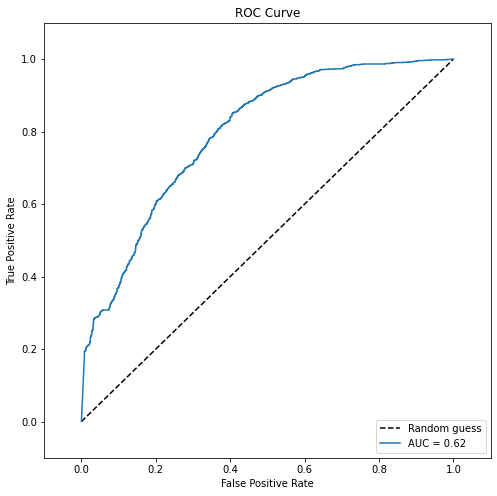

In [68]:
y_pred_prob1 = modelG.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob1)
plt.figure(figsize=(8, 8))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.title('ROC Curve')
plt.plot(fpr, tpr, label = 'AUC = {:.2f}'.format(aucGNB))
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

# MultinomialNB

In [69]:
modelM = MultinomialNB()
modelM.fit(X_train, y_train);

In [70]:
#accrancy for taining data by cross validation
scores = cross_val_score(modelM, X_train, y_train, cv=10)
scores.mean()

0.5994285714285714

In [71]:
predictionsM = modelM.predict(X_test)

In [72]:
#accyrancy for testing data, use the model to compare the true y and prediction y.
accuracy_score(y_test, predictionsM)

0.5873333333333334

Text(91.68, 0.5, 'predicted label')

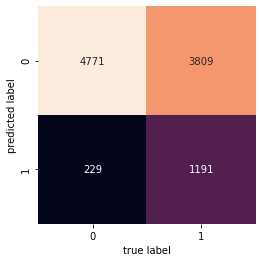

In [73]:
mat = confusion_matrix(y, modelM.predict(X))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=modelM.classes_, yticklabels=modelM.classes_)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [74]:
%%timeit
modelM.fit(X_train,y_train)

10.5 ms ± 1.3 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [75]:
modelM = MultinomialNB()
modelM.fit(X, y);

In [76]:
precisionMNB = precision_score(y_test, modelM.predict(X_test))
recallMNB = recall_score(y_test, modelM.predict(X_test))
f1MNB = f1_score(y_test, modelM.predict(X_test))
aucMNB = roc_auc_score(y_test, modelM.predict(X_test))
accMNB = accuracy_score(y_test, modelM.predict(X_test))

In [77]:
print("Precision on test data is: %f" %precisionMNB)
print("Recall on test data is: %f" %recallMNB)
print("F1-Score on test data is: %f" %f1MNB)
print("Area under ROC on test data is: %f" %aucMNB)
print("Accuracy on test data is: %f" %accMNB)

Precision on test data is: 0.806452
Recall on test data is: 0.233333
F1-Score on test data is: 0.361944
Area under ROC on test data is: 0.588667
Accuracy on test data is: 0.588667


In [78]:
print(metrics.classification_report(y_test, predictionsM))

              precision    recall  f1-score   support

           0       0.55      0.94      0.70      1500
           1       0.80      0.23      0.36      1500

    accuracy                           0.59      3000
   macro avg       0.68      0.59      0.53      3000
weighted avg       0.68      0.59      0.53      3000



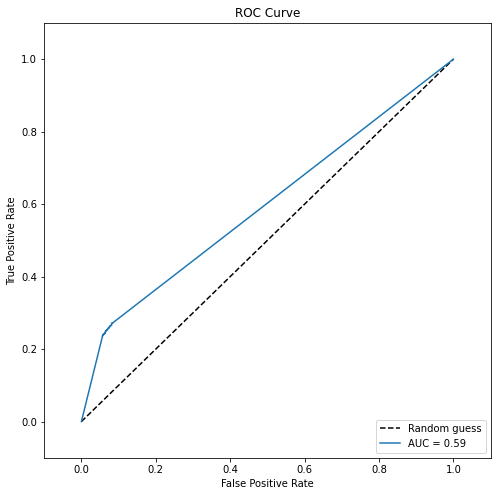

In [79]:
y_pred_prob2 = modelM.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob2)
plt.figure(figsize=(8, 8))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.title('ROC Curve')
plt.plot(fpr, tpr, label = 'AUC = {:.2f}'.format(aucMNB))
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

# Neural Network

In [84]:
attributes = list(X_train)
X_train[attributes]

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,workclass_0,workclass_1,workclass_2,workclass_3,workclass_4,...,native-country_31,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40
18055,49,169818,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
24102,21,275421,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
27623,23,209483,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
16137,41,190910,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4649,34,301251,0,0,50,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17793,37,217054,0,0,35,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
16490,17,65368,0,0,12,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
41365,29,160786,0,0,35,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
35617,46,111163,0,0,38,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


/opt/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='income', ylabel='count'>

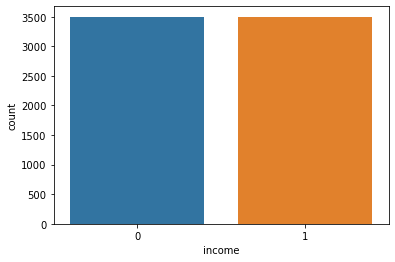

In [85]:
sns.countplot(y_train)

<AxesSubplot:>

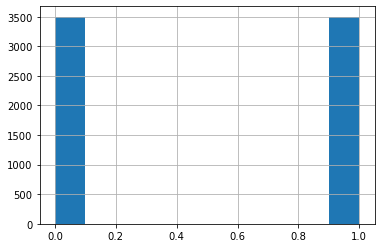

In [86]:
#Categorical data has already been encoded in the steps above in label encoding and one hot encoding,so we will skip this and continue with histgram.
y_train.hist()

In [87]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

from tensorflow import keras

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

keras.__version__

'2.2.4-tf'

In [89]:
#using keras utils function to do the one-hot encoding for categorical data.
y = keras.utils.to_categorical(y_train)
y

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [90]:
X = X_train[attributes].values
X

array([[    49, 169818,      0, ...,      1,      0,      0],
       [    21, 275421,      0, ...,      1,      0,      0],
       [    23, 209483,      0, ...,      1,      0,      0],
       ...,
       [    29, 160786,      0, ...,      1,      0,      0],
       [    46, 111163,      0, ...,      1,      0,      0],
       [    41,  75171,      0, ...,      1,      0,      0]])

Train on 7000 samples
Epoch 1/500
7000/7000 [==============================] - 6s 843us/sample - loss: 0.7130 - accuracy: 0.4870
Epoch 2/500
7000/7000 [==============================] - 2s 240us/sample - loss: 0.6937 - accuracy: 0.4984
Epoch 3/500
7000/7000 [==============================] - 2s 304us/sample - loss: 0.6936 - accuracy: 0.5027
Epoch 4/500
7000/7000 [==============================] - 2s 356us/sample - loss: 0.6926 - accuracy: 0.5130
Epoch 5/500
7000/7000 [==============================] - 3s 366us/sample - loss: 0.6936 - accuracy: 0.4929
Epoch 6/500
7000/7000 [==============================] - 3s 398us/sample - loss: 0.6929 - accuracy: 0.5040
Epoch 7/500
7000/7000 [==============================] - 3s 379us/sample - loss: 0.6930 - accuracy: 0.5006
Epoch 8/500
7000/7000 [==============================] - 2s 242us/sample - loss: 0.6927 - accuracy: 0.4913
Epoch 9/500
7000/7000 [==============================] - 2s 234us/sample - loss: 0.6927 - accuracy: 0.4939
Epoch 10/500
70

7000/7000 [==============================] - 1s 123us/sample - loss: 0.6879 - accuracy: 0.5031
Epoch 152/500
7000/7000 [==============================] - 1s 130us/sample - loss: 0.6877 - accuracy: 0.5117
Epoch 153/500
7000/7000 [==============================] - 1s 128us/sample - loss: 0.6880 - accuracy: 0.5119
Epoch 154/500
7000/7000 [==============================] - 1s 125us/sample - loss: 0.6880 - accuracy: 0.5101
Epoch 155/500
7000/7000 [==============================] - 1s 124us/sample - loss: 0.6878 - accuracy: 0.5060
Epoch 156/500
7000/7000 [==============================] - 1s 130us/sample - loss: 0.6872 - accuracy: 0.5160
Epoch 157/500
7000/7000 [==============================] - 1s 126us/sample - loss: 0.6883 - accuracy: 0.4977
Epoch 158/500
7000/7000 [==============================] - 1s 134us/sample - loss: 0.6880 - accuracy: 0.5033
Epoch 159/500
7000/7000 [==============================] - 1s 139us/sample - loss: 0.6878 - accuracy: 0.5050
Epoch 160/500
7000/7000 [========

Epoch 301/500
7000/7000 [==============================] - 1s 138us/sample - loss: 0.6876 - accuracy: 0.5016
Epoch 302/500
7000/7000 [==============================] - 1s 141us/sample - loss: 0.6875 - accuracy: 0.5043
Epoch 303/500
7000/7000 [==============================] - 1s 139us/sample - loss: 0.6875 - accuracy: 0.5036
Epoch 304/500
7000/7000 [==============================] - 1s 168us/sample - loss: 0.6875 - accuracy: 0.5054
Epoch 305/500
7000/7000 [==============================] - 1s 157us/sample - loss: 0.6873 - accuracy: 0.5129
Epoch 306/500
7000/7000 [==============================] - 1s 176us/sample - loss: 0.6873 - accuracy: 0.5010
Epoch 307/500
7000/7000 [==============================] - 1s 169us/sample - loss: 0.6873 - accuracy: 0.5097
Epoch 308/500
7000/7000 [==============================] - 1s 160us/sample - loss: 0.6871 - accuracy: 0.5151
Epoch 309/500
7000/7000 [==============================] - 1s 166us/sample - loss: 0.6868 - accuracy: 0.5090
Epoch 310/500
7000/

7000/7000 [==============================] - 1s 122us/sample - loss: 0.6874 - accuracy: 0.5030
Epoch 451/500
7000/7000 [==============================] - 1s 152us/sample - loss: 0.6871 - accuracy: 0.5074
Epoch 452/500
7000/7000 [==============================] - 1s 125us/sample - loss: 0.6875 - accuracy: 0.5007
Epoch 453/500
7000/7000 [==============================] - 1s 127us/sample - loss: 0.6870 - accuracy: 0.5069
Epoch 454/500
7000/7000 [==============================] - 1s 123us/sample - loss: 0.6874 - accuracy: 0.5040
Epoch 455/500
7000/7000 [==============================] - 1s 123us/sample - loss: 0.6875 - accuracy: 0.5010
Epoch 456/500
7000/7000 [==============================] - 1s 128us/sample - loss: 0.6875 - accuracy: 0.4970
Epoch 457/500
7000/7000 [==============================] - 1s 133us/sample - loss: 0.6873 - accuracy: 0.4996
Epoch 458/500
7000/7000 [==============================] - 1s 140us/sample - loss: 0.6870 - accuracy: 0.5069
Epoch 459/500
7000/7000 [========

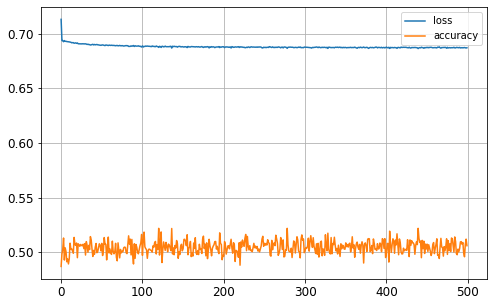

In [162]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


model = keras.models.Sequential()
model.add(keras.layers.Dense(30, input_dim=len(attributes), activation="sigmoid"))
# more hidden layer(s) could be added here
# model.add(keras.layers.Dense(6, activation="sigmoid"))
model.add(keras.layers.Dense(2, activation="softmax"))

model.compile(
    loss='binary_crossentropy',
    optimizer='sgd',
#    optimizer = keras.optimizers.SGD(lr=0.01, nesterov=True),
    metrics=['accuracy'])

history = model.fit(X, y, epochs=500, batch_size=32)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

Train on 7000 samples
Epoch 1/500
7000/7000 [==============================] - 3s 374us/sample - loss: 0.7130 - accuracy: 0.4870
Epoch 2/500
7000/7000 [==============================] - 1s 165us/sample - loss: 0.6937 - accuracy: 0.4984
Epoch 3/500
7000/7000 [==============================] - 2s 220us/sample - loss: 0.6936 - accuracy: 0.5027
Epoch 4/500
7000/7000 [==============================] - 2s 231us/sample - loss: 0.6926 - accuracy: 0.5130
Epoch 5/500
7000/7000 [==============================] - 2s 219us/sample - loss: 0.6936 - accuracy: 0.4929
Epoch 6/500
7000/7000 [==============================] - 2s 223us/sample - loss: 0.6929 - accuracy: 0.5040
Epoch 7/500
7000/7000 [==============================] - 2s 307us/sample - loss: 0.6930 - accuracy: 0.5006
Epoch 8/500
7000/7000 [==============================] - 2s 300us/sample - loss: 0.6927 - accuracy: 0.4913
Epoch 9/500
7000/7000 [==============================] - 2s 262us/sample - loss: 0.6927 - accuracy: 0.4939
Epoch 10/500
70

7000/7000 [==============================] - 1s 148us/sample - loss: 0.6879 - accuracy: 0.5031
Epoch 152/500
7000/7000 [==============================] - 1s 145us/sample - loss: 0.6877 - accuracy: 0.5117
Epoch 153/500
7000/7000 [==============================] - 1s 146us/sample - loss: 0.6880 - accuracy: 0.5119
Epoch 154/500
7000/7000 [==============================] - 1s 148us/sample - loss: 0.6880 - accuracy: 0.5101
Epoch 155/500
7000/7000 [==============================] - 1s 153us/sample - loss: 0.6878 - accuracy: 0.5060
Epoch 156/500
7000/7000 [==============================] - 1s 167us/sample - loss: 0.6872 - accuracy: 0.5160
Epoch 157/500
7000/7000 [==============================] - 1s 188us/sample - loss: 0.6883 - accuracy: 0.4977
Epoch 158/500
7000/7000 [==============================] - 1s 195us/sample - loss: 0.6880 - accuracy: 0.5033
Epoch 159/500
7000/7000 [==============================] - 1s 196us/sample - loss: 0.6878 - accuracy: 0.5050
Epoch 160/500
7000/7000 [========

7000/7000 [==============================] - 1s 126us/sample - loss: 0.6876 - accuracy: 0.5016
Epoch 302/500
7000/7000 [==============================] - 1s 154us/sample - loss: 0.6875 - accuracy: 0.5043
Epoch 303/500
7000/7000 [==============================] - 1s 153us/sample - loss: 0.6875 - accuracy: 0.5036
Epoch 304/500
7000/7000 [==============================] - 1s 127us/sample - loss: 0.6875 - accuracy: 0.5054
Epoch 305/500
7000/7000 [==============================] - 1s 129us/sample - loss: 0.6873 - accuracy: 0.5129
Epoch 306/500
7000/7000 [==============================] - 1s 127us/sample - loss: 0.6873 - accuracy: 0.5010
Epoch 307/500
7000/7000 [==============================] - 1s 179us/sample - loss: 0.6873 - accuracy: 0.5097
Epoch 308/500
7000/7000 [==============================] - 1s 161us/sample - loss: 0.6871 - accuracy: 0.5151
Epoch 309/500
7000/7000 [==============================] - 1s 175us/sample - loss: 0.6868 - accuracy: 0.5090
Epoch 310/500
7000/7000 [========

7000/7000 [==============================] - 2s 298us/sample - loss: 0.6871 - accuracy: 0.5074
Epoch 452/500
7000/7000 [==============================] - 2s 268us/sample - loss: 0.6875 - accuracy: 0.5007
Epoch 453/500
7000/7000 [==============================] - 1s 162us/sample - loss: 0.6870 - accuracy: 0.5069
Epoch 454/500
7000/7000 [==============================] - 1s 160us/sample - loss: 0.6874 - accuracy: 0.5040
Epoch 455/500
7000/7000 [==============================] - 2s 226us/sample - loss: 0.6875 - accuracy: 0.5010
Epoch 456/500
7000/7000 [==============================] - 1s 182us/sample - loss: 0.6875 - accuracy: 0.4970
Epoch 457/500
7000/7000 [==============================] - 1s 194us/sample - loss: 0.6873 - accuracy: 0.4996
Epoch 458/500
7000/7000 [==============================] - 3s 366us/sample - loss: 0.6870 - accuracy: 0.5069
Epoch 459/500
7000/7000 [==============================] - 2s 320us/sample - loss: 0.6871 - accuracy: 0.5089
Epoch 460/500
7000/7000 [========

7000/7000 [==============================] - 1s 136us/sample - loss: 0.6888 - accuracy: 0.4971
Epoch 102/500
7000/7000 [==============================] - 1s 145us/sample - loss: 0.6877 - accuracy: 0.5110
Epoch 103/500
7000/7000 [==============================] - 1s 141us/sample - loss: 0.6883 - accuracy: 0.5184
Epoch 104/500
7000/7000 [==============================] - 1s 146us/sample - loss: 0.6883 - accuracy: 0.5050
Epoch 105/500
7000/7000 [==============================] - 1s 153us/sample - loss: 0.6887 - accuracy: 0.5033
Epoch 106/500
7000/7000 [==============================] - 1s 155us/sample - loss: 0.6884 - accuracy: 0.5024
Epoch 107/500
7000/7000 [==============================] - 3s 445us/sample - loss: 0.6886 - accuracy: 0.4944
Epoch 108/500
7000/7000 [==============================] - 3s 480us/sample - loss: 0.6885 - accuracy: 0.5013
Epoch 109/500
7000/7000 [==============================] - 4s 505us/sample - loss: 0.6884 - accuracy: 0.5029
Epoch 110/500
7000/7000 [========

7000/7000 [==============================] - 1s 207us/sample - loss: 0.6873 - accuracy: 0.5081
Epoch 252/500
7000/7000 [==============================] - 2s 275us/sample - loss: 0.6875 - accuracy: 0.5064
Epoch 253/500
7000/7000 [==============================] - 2s 315us/sample - loss: 0.6872 - accuracy: 0.5080
Epoch 254/500
7000/7000 [==============================] - 3s 474us/sample - loss: 0.6875 - accuracy: 0.5066
Epoch 255/500
7000/7000 [==============================] - 3s 368us/sample - loss: 0.6875 - accuracy: 0.5114
Epoch 256/500
7000/7000 [==============================] - 3s 360us/sample - loss: 0.6873 - accuracy: 0.5087
Epoch 257/500
7000/7000 [==============================] - 2s 317us/sample - loss: 0.6881 - accuracy: 0.5081
Epoch 258/500
7000/7000 [==============================] - 2s 272us/sample - loss: 0.6879 - accuracy: 0.4973
Epoch 259/500
7000/7000 [==============================] - 3s 358us/sample - loss: 0.6875 - accuracy: 0.4964
Epoch 260/500
7000/7000 [========

Epoch 401/500
7000/7000 [==============================] - 4s 521us/sample - loss: 0.6877 - accuracy: 0.4994
Epoch 402/500
7000/7000 [==============================] - 5s 668us/sample - loss: 0.6871 - accuracy: 0.5080
Epoch 403/500
7000/7000 [==============================] - 6s 811us/sample - loss: 0.6871 - accuracy: 0.5080
Epoch 404/500
7000/7000 [==============================] - 4s 621us/sample - loss: 0.6875 - accuracy: 0.4910
Epoch 405/500
7000/7000 [==============================] - 4s 607us/sample - loss: 0.6864 - accuracy: 0.5193
Epoch 406/500
7000/7000 [==============================] - 3s 378us/sample - loss: 0.6874 - accuracy: 0.5070
Epoch 407/500
7000/7000 [==============================] - 3s 492us/sample - loss: 0.6871 - accuracy: 0.4999
Epoch 408/500
7000/7000 [==============================] - 5s 645us/sample - loss: 0.6873 - accuracy: 0.5070
Epoch 409/500
7000/7000 [==============================] - 5s 666us/sample - loss: 0.6871 - accuracy: 0.5123
Epoch 410/500
7000/

7000/7000 [==============================] - 2s 273us/sample - loss: 0.6895 - accuracy: 0.5081
Epoch 52/500
7000/7000 [==============================] - 2s 233us/sample - loss: 0.6897 - accuracy: 0.4970
Epoch 53/500
7000/7000 [==============================] - 1s 205us/sample - loss: 0.6895 - accuracy: 0.5019
Epoch 54/500
7000/7000 [==============================] - 1s 205us/sample - loss: 0.6892 - accuracy: 0.5134
Epoch 55/500
7000/7000 [==============================] - 1s 180us/sample - loss: 0.6890 - accuracy: 0.5073
Epoch 56/500
7000/7000 [==============================] - 1s 193us/sample - loss: 0.6896 - accuracy: 0.5073
Epoch 57/500
7000/7000 [==============================] - 2s 300us/sample - loss: 0.6895 - accuracy: 0.4930
Epoch 58/500
7000/7000 [==============================] - 2s 256us/sample - loss: 0.6893 - accuracy: 0.5046
Epoch 59/500
7000/7000 [==============================] - 2s 271us/sample - loss: 0.6891 - accuracy: 0.5139
Epoch 60/500
7000/7000 [=================

7000/7000 [==============================] - 1s 171us/sample - loss: 0.6880 - accuracy: 0.4963
Epoch 202/500
7000/7000 [==============================] - 1s 177us/sample - loss: 0.6872 - accuracy: 0.5097
Epoch 203/500
7000/7000 [==============================] - 1s 176us/sample - loss: 0.6877 - accuracy: 0.5064
Epoch 204/500
7000/7000 [==============================] - 1s 198us/sample - loss: 0.6879 - accuracy: 0.4983
Epoch 205/500
7000/7000 [==============================] - 1s 202us/sample - loss: 0.6877 - accuracy: 0.5019
Epoch 206/500
7000/7000 [==============================] - 2s 247us/sample - loss: 0.6878 - accuracy: 0.5057
Epoch 207/500
7000/7000 [==============================] - 2s 254us/sample - loss: 0.6875 - accuracy: 0.5060
Epoch 208/500
7000/7000 [==============================] - 2s 263us/sample - loss: 0.6876 - accuracy: 0.5031
Epoch 209/500
7000/7000 [==============================] - 2s 265us/sample - loss: 0.6878 - accuracy: 0.5074
Epoch 210/500
7000/7000 [========

7000/7000 [==============================] - 2s 285us/sample - loss: 0.6873 - accuracy: 0.5086
Epoch 352/500
7000/7000 [==============================] - 1s 173us/sample - loss: 0.6870 - accuracy: 0.5051
Epoch 353/500
7000/7000 [==============================] - 1s 169us/sample - loss: 0.6872 - accuracy: 0.5070
Epoch 354/500
7000/7000 [==============================] - 1s 189us/sample - loss: 0.6872 - accuracy: 0.5047
Epoch 355/500
7000/7000 [==============================] - 1s 170us/sample - loss: 0.6873 - accuracy: 0.5076
Epoch 356/500
7000/7000 [==============================] - 1s 186us/sample - loss: 0.6872 - accuracy: 0.5083
Epoch 357/500
7000/7000 [==============================] - 2s 245us/sample - loss: 0.6875 - accuracy: 0.5003
Epoch 358/500
7000/7000 [==============================] - 2s 282us/sample - loss: 0.6872 - accuracy: 0.5050
Epoch 359/500
7000/7000 [==============================] - 3s 359us/sample - loss: 0.6873 - accuracy: 0.5141
Epoch 360/500
7000/7000 [========

7000/7000 [==============================] - 2s 343us/sample - loss: 0.7130 - accuracy: 0.4870
Epoch 2/500
7000/7000 [==============================] - 1s 129us/sample - loss: 0.6937 - accuracy: 0.4984
Epoch 3/500
7000/7000 [==============================] - 1s 129us/sample - loss: 0.6936 - accuracy: 0.5027
Epoch 4/500
7000/7000 [==============================] - 1s 131us/sample - loss: 0.6926 - accuracy: 0.5130
Epoch 5/500
7000/7000 [==============================] - 1s 132us/sample - loss: 0.6936 - accuracy: 0.4929
Epoch 6/500
7000/7000 [==============================] - 1s 144us/sample - loss: 0.6929 - accuracy: 0.5040
Epoch 7/500
7000/7000 [==============================] - 1s 146us/sample - loss: 0.6930 - accuracy: 0.5006
Epoch 8/500
7000/7000 [==============================] - 1s 179us/sample - loss: 0.6927 - accuracy: 0.4913
Epoch 9/500
7000/7000 [==============================] - 1s 158us/sample - loss: 0.6927 - accuracy: 0.4939
Epoch 10/500
7000/7000 [=========================

7000/7000 [==============================] - 2s 248us/sample - loss: 0.6879 - accuracy: 0.5031
Epoch 152/500
7000/7000 [==============================] - 2s 244us/sample - loss: 0.6877 - accuracy: 0.5117
Epoch 153/500
7000/7000 [==============================] - 1s 170us/sample - loss: 0.6880 - accuracy: 0.5119
Epoch 154/500
7000/7000 [==============================] - 1s 176us/sample - loss: 0.6880 - accuracy: 0.5101
Epoch 155/500
7000/7000 [==============================] - 1s 196us/sample - loss: 0.6878 - accuracy: 0.5060
Epoch 156/500
7000/7000 [==============================] - 1s 163us/sample - loss: 0.6872 - accuracy: 0.5160
Epoch 157/500
7000/7000 [==============================] - 2s 248us/sample - loss: 0.6883 - accuracy: 0.4977
Epoch 158/500
7000/7000 [==============================] - 2s 285us/sample - loss: 0.6880 - accuracy: 0.5033
Epoch 159/500
7000/7000 [==============================] - 2s 277us/sample - loss: 0.6878 - accuracy: 0.5050
Epoch 160/500
7000/7000 [========

7000/7000 [==============================] - 1s 196us/sample - loss: 0.6876 - accuracy: 0.5016
Epoch 302/500
7000/7000 [==============================] - 1s 161us/sample - loss: 0.6875 - accuracy: 0.5043
Epoch 303/500
7000/7000 [==============================] - 1s 169us/sample - loss: 0.6875 - accuracy: 0.5036
Epoch 304/500
7000/7000 [==============================] - 1s 157us/sample - loss: 0.6875 - accuracy: 0.5054
Epoch 305/500
7000/7000 [==============================] - 1s 188us/sample - loss: 0.6873 - accuracy: 0.5129
Epoch 306/500
7000/7000 [==============================] - 1s 190us/sample - loss: 0.6873 - accuracy: 0.5010
Epoch 307/500
7000/7000 [==============================] - 2s 219us/sample - loss: 0.6873 - accuracy: 0.5097
Epoch 308/500
7000/7000 [==============================] - 2s 225us/sample - loss: 0.6871 - accuracy: 0.5151
Epoch 309/500
7000/7000 [==============================] - 2s 242us/sample - loss: 0.6868 - accuracy: 0.5090
Epoch 310/500
7000/7000 [========

7000/7000 [==============================] - 1s 199us/sample - loss: 0.6871 - accuracy: 0.5074
Epoch 452/500
7000/7000 [==============================] - 1s 157us/sample - loss: 0.6875 - accuracy: 0.5007
Epoch 453/500
7000/7000 [==============================] - 1s 171us/sample - loss: 0.6870 - accuracy: 0.5069
Epoch 454/500
7000/7000 [==============================] - 1s 197us/sample - loss: 0.6874 - accuracy: 0.5040
Epoch 455/500
7000/7000 [==============================] - 2s 225us/sample - loss: 0.6875 - accuracy: 0.5010
Epoch 456/500
7000/7000 [==============================] - 2s 237us/sample - loss: 0.6875 - accuracy: 0.4970
Epoch 457/500
7000/7000 [==============================] - 2s 227us/sample - loss: 0.6873 - accuracy: 0.4996
Epoch 458/500
7000/7000 [==============================] - 2s 231us/sample - loss: 0.6870 - accuracy: 0.5069
Epoch 459/500
7000/7000 [==============================] - 2s 252us/sample - loss: 0.6871 - accuracy: 0.5089
Epoch 460/500
7000/7000 [========

Epoch 102/500
7000/7000 [==============================] - 1s 195us/sample - loss: 0.6877 - accuracy: 0.5110
Epoch 103/500
7000/7000 [==============================] - 1s 161us/sample - loss: 0.6883 - accuracy: 0.5184
Epoch 104/500
7000/7000 [==============================] - 1s 163us/sample - loss: 0.6883 - accuracy: 0.5050
Epoch 105/500
7000/7000 [==============================] - 1s 186us/sample - loss: 0.6887 - accuracy: 0.5033
Epoch 106/500
7000/7000 [==============================] - 2s 230us/sample - loss: 0.6884 - accuracy: 0.5024
Epoch 107/500
7000/7000 [==============================] - 2s 241us/sample - loss: 0.6886 - accuracy: 0.4944
Epoch 108/500
7000/7000 [==============================] - 2s 246us/sample - loss: 0.6885 - accuracy: 0.5013
Epoch 109/500
7000/7000 [==============================] - 2s 276us/sample - loss: 0.6884 - accuracy: 0.5029
Epoch 110/500
7000/7000 [==============================] - 2s 283us/sample - loss: 0.6884 - accuracy: 0.5027
Epoch 111/500
7000/

7000/7000 [==============================] - 1s 192us/sample - loss: 0.6875 - accuracy: 0.5064
Epoch 253/500
7000/7000 [==============================] - 2s 239us/sample - loss: 0.6872 - accuracy: 0.5080
Epoch 254/500
7000/7000 [==============================] - 2s 271us/sample - loss: 0.6875 - accuracy: 0.5066
Epoch 255/500
7000/7000 [==============================] - 2s 260us/sample - loss: 0.6875 - accuracy: 0.5114
Epoch 256/500
7000/7000 [==============================] - 2s 252us/sample - loss: 0.6873 - accuracy: 0.5087
Epoch 257/500
7000/7000 [==============================] - 2s 283us/sample - loss: 0.6881 - accuracy: 0.5081
Epoch 258/500
7000/7000 [==============================] - 1s 179us/sample - loss: 0.6879 - accuracy: 0.4973
Epoch 259/500
7000/7000 [==============================] - 1s 163us/sample - loss: 0.6875 - accuracy: 0.4964
Epoch 260/500
7000/7000 [==============================] - 1s 164us/sample - loss: 0.6873 - accuracy: 0.5109
Epoch 261/500
7000/7000 [========

7000/7000 [==============================] - 2s 266us/sample - loss: 0.6877 - accuracy: 0.4994
Epoch 402/500
7000/7000 [==============================] - 2s 249us/sample - loss: 0.6871 - accuracy: 0.5080
Epoch 403/500
7000/7000 [==============================] - 2s 264us/sample - loss: 0.6871 - accuracy: 0.5080
Epoch 404/500
7000/7000 [==============================] - 2s 264us/sample - loss: 0.6875 - accuracy: 0.4910
Epoch 405/500
7000/7000 [==============================] - 2s 224us/sample - loss: 0.6864 - accuracy: 0.5193
Epoch 406/500
7000/7000 [==============================] - 1s 163us/sample - loss: 0.6874 - accuracy: 0.5070
Epoch 407/500
7000/7000 [==============================] - 1s 185us/sample - loss: 0.6871 - accuracy: 0.4999
Epoch 408/500
7000/7000 [==============================] - 1s 184us/sample - loss: 0.6873 - accuracy: 0.5070
Epoch 409/500
7000/7000 [==============================] - 1s 192us/sample - loss: 0.6871 - accuracy: 0.5123
Epoch 410/500
7000/7000 [========

7000/7000 [==============================] - 2s 260us/sample - loss: 0.6895 - accuracy: 0.5081
Epoch 52/500
7000/7000 [==============================] - 2s 262us/sample - loss: 0.6897 - accuracy: 0.4970
Epoch 53/500
7000/7000 [==============================] - 2s 262us/sample - loss: 0.6895 - accuracy: 0.5019
Epoch 54/500
7000/7000 [==============================] - 1s 167us/sample - loss: 0.6892 - accuracy: 0.5134
Epoch 55/500
7000/7000 [==============================] - 1s 169us/sample - loss: 0.6890 - accuracy: 0.5073
Epoch 56/500
7000/7000 [==============================] - 1s 162us/sample - loss: 0.6896 - accuracy: 0.5073
Epoch 57/500
7000/7000 [==============================] - 1s 161us/sample - loss: 0.6895 - accuracy: 0.4930
Epoch 58/500
7000/7000 [==============================] - 1s 199us/sample - loss: 0.6893 - accuracy: 0.5046
Epoch 59/500
7000/7000 [==============================] - 2s 236us/sample - loss: 0.6891 - accuracy: 0.5139
Epoch 60/500
7000/7000 [=================

7000/7000 [==============================] - 2s 277us/sample - loss: 0.6880 - accuracy: 0.4963
Epoch 202/500
7000/7000 [==============================] - 1s 175us/sample - loss: 0.6872 - accuracy: 0.5097
Epoch 203/500
7000/7000 [==============================] - 1s 157us/sample - loss: 0.6877 - accuracy: 0.5064
Epoch 204/500
7000/7000 [==============================] - 1s 160us/sample - loss: 0.6879 - accuracy: 0.4983
Epoch 205/500
7000/7000 [==============================] - 1s 160us/sample - loss: 0.6877 - accuracy: 0.5019
Epoch 206/500
7000/7000 [==============================] - 1s 175us/sample - loss: 0.6878 - accuracy: 0.5057
Epoch 207/500
7000/7000 [==============================] - 2s 219us/sample - loss: 0.6875 - accuracy: 0.5060
Epoch 208/500
7000/7000 [==============================] - 2s 260us/sample - loss: 0.6876 - accuracy: 0.5031
Epoch 209/500
7000/7000 [==============================] - 2s 345us/sample - loss: 0.6878 - accuracy: 0.5074
Epoch 210/500
7000/7000 [========

7000/7000 [==============================] - 2s 243us/sample - loss: 0.6874 - accuracy: 0.5027
Epoch 351/500
7000/7000 [==============================] - 1s 155us/sample - loss: 0.6873 - accuracy: 0.5086
Epoch 352/500
7000/7000 [==============================] - 1s 152us/sample - loss: 0.6870 - accuracy: 0.5051
Epoch 353/500
7000/7000 [==============================] - 1s 153us/sample - loss: 0.6872 - accuracy: 0.5070
Epoch 354/500
7000/7000 [==============================] - 1s 155us/sample - loss: 0.6872 - accuracy: 0.5047
Epoch 355/500
7000/7000 [==============================] - 1s 167us/sample - loss: 0.6873 - accuracy: 0.5076
Epoch 356/500
7000/7000 [==============================] - 1s 209us/sample - loss: 0.6872 - accuracy: 0.5083
Epoch 357/500
7000/7000 [==============================] - 2s 228us/sample - loss: 0.6875 - accuracy: 0.5003
Epoch 358/500
7000/7000 [==============================] - 2s 242us/sample - loss: 0.6872 - accuracy: 0.5050
Epoch 359/500
7000/7000 [========

7000/7000 [==============================] - 2s 257us/sample - loss: 0.6871 - accuracy: 0.5060
Train on 7000 samples
Epoch 1/500
7000/7000 [==============================] - 3s 383us/sample - loss: 0.7130 - accuracy: 0.4870
Epoch 2/500
7000/7000 [==============================] - 1s 166us/sample - loss: 0.6937 - accuracy: 0.4984
Epoch 3/500
7000/7000 [==============================] - 1s 172us/sample - loss: 0.6936 - accuracy: 0.5027
Epoch 4/500
7000/7000 [==============================] - 1s 161us/sample - loss: 0.6926 - accuracy: 0.5130
Epoch 5/500
7000/7000 [==============================] - 1s 180us/sample - loss: 0.6936 - accuracy: 0.4929
Epoch 6/500
7000/7000 [==============================] - 2s 296us/sample - loss: 0.6929 - accuracy: 0.5040
Epoch 7/500
7000/7000 [==============================] - 2s 252us/sample - loss: 0.6930 - accuracy: 0.5006
Epoch 8/500
7000/7000 [==============================] - 2s 264us/sample - loss: 0.6927 - accuracy: 0.4913
Epoch 9/500
7000/7000 [====

7000/7000 [==============================] - 1s 158us/sample - loss: 0.6881 - accuracy: 0.5013
Epoch 151/500
7000/7000 [==============================] - 1s 157us/sample - loss: 0.6879 - accuracy: 0.5031
Epoch 152/500
7000/7000 [==============================] - 1s 166us/sample - loss: 0.6877 - accuracy: 0.5117
Epoch 153/500
7000/7000 [==============================] - 1s 184us/sample - loss: 0.6880 - accuracy: 0.5119
Epoch 154/500
7000/7000 [==============================] - 2s 219us/sample - loss: 0.6880 - accuracy: 0.5101
Epoch 155/500
7000/7000 [==============================] - 2s 226us/sample - loss: 0.6878 - accuracy: 0.5060
Epoch 156/500
7000/7000 [==============================] - 2s 237us/sample - loss: 0.6872 - accuracy: 0.5160
Epoch 157/500
7000/7000 [==============================] - 2s 241us/sample - loss: 0.6883 - accuracy: 0.4977
Epoch 158/500
7000/7000 [==============================] - 2s 250us/sample - loss: 0.6880 - accuracy: 0.5033
Epoch 159/500
7000/7000 [========

7000/7000 [==============================] - 1s 163us/sample - loss: 0.6874 - accuracy: 0.5080
Epoch 226/500
7000/7000 [==============================] - 1s 155us/sample - loss: 0.6875 - accuracy: 0.5054
Epoch 227/500
7000/7000 [==============================] - 1s 169us/sample - loss: 0.6872 - accuracy: 0.5127
Epoch 228/500
7000/7000 [==============================] - 1s 211us/sample - loss: 0.6872 - accuracy: 0.5163
Epoch 229/500
7000/7000 [==============================] - 2s 224us/sample - loss: 0.6876 - accuracy: 0.5014
Epoch 230/500
7000/7000 [==============================] - 2s 236us/sample - loss: 0.6873 - accuracy: 0.5144
Epoch 231/500
7000/7000 [==============================] - 2s 229us/sample - loss: 0.6878 - accuracy: 0.5057
Epoch 232/500
7000/7000 [==============================] - 2s 243us/sample - loss: 0.6877 - accuracy: 0.5021
Epoch 233/500
7000/7000 [==============================] - 2s 255us/sample - loss: 0.6873 - accuracy: 0.5060
Epoch 234/500
7000/7000 [========

7000/7000 [==============================] - 1s 160us/sample - loss: 0.6871 - accuracy: 0.5086
Epoch 376/500
7000/7000 [==============================] - 1s 153us/sample - loss: 0.6873 - accuracy: 0.5060
Epoch 377/500
7000/7000 [==============================] - 1s 165us/sample - loss: 0.6875 - accuracy: 0.5007
Epoch 378/500
7000/7000 [==============================] - 1s 156us/sample - loss: 0.6871 - accuracy: 0.5120
Epoch 379/500
7000/7000 [==============================] - 1s 166us/sample - loss: 0.6865 - accuracy: 0.5124
Epoch 380/500
7000/7000 [==============================] - 1s 168us/sample - loss: 0.6869 - accuracy: 0.5123
Epoch 381/500
7000/7000 [==============================] - 2s 223us/sample - loss: 0.6874 - accuracy: 0.5006
Epoch 382/500
7000/7000 [==============================] - 2s 235us/sample - loss: 0.6873 - accuracy: 0.5020
Epoch 383/500
7000/7000 [==============================] - 2s 221us/sample - loss: 0.6872 - accuracy: 0.5061
Epoch 384/500
7000/7000 [========

7000/7000 [==============================] - 1s 209us/sample - loss: 0.6907 - accuracy: 0.5071
Epoch 26/500
7000/7000 [==============================] - 1s 208us/sample - loss: 0.6906 - accuracy: 0.5061
Epoch 27/500
7000/7000 [==============================] - 1s 206us/sample - loss: 0.6907 - accuracy: 0.5060
Epoch 28/500
7000/7000 [==============================] - 2s 252us/sample - loss: 0.6906 - accuracy: 0.5073
Epoch 29/500
7000/7000 [==============================] - 2s 240us/sample - loss: 0.6907 - accuracy: 0.5033
Epoch 30/500
7000/7000 [==============================] - 2s 226us/sample - loss: 0.6906 - accuracy: 0.5079
Epoch 31/500
7000/7000 [==============================] - 1s 184us/sample - loss: 0.6907 - accuracy: 0.4974
Epoch 32/500
7000/7000 [==============================] - 1s 154us/sample - loss: 0.6904 - accuracy: 0.5097
Epoch 33/500
7000/7000 [==============================] - 1s 158us/sample - loss: 0.6901 - accuracy: 0.5061
Epoch 34/500
7000/7000 [=================

Epoch 101/500
7000/7000 [==============================] - 2s 221us/sample - loss: 0.6888 - accuracy: 0.4971
Epoch 102/500
7000/7000 [==============================] - 2s 257us/sample - loss: 0.6877 - accuracy: 0.5110
Epoch 103/500
7000/7000 [==============================] - 2s 226us/sample - loss: 0.6883 - accuracy: 0.5184
Epoch 104/500
7000/7000 [==============================] - 1s 194us/sample - loss: 0.6883 - accuracy: 0.5050
Epoch 105/500
7000/7000 [==============================] - 1s 162us/sample - loss: 0.6887 - accuracy: 0.5033
Epoch 106/500
7000/7000 [==============================] - 1s 150us/sample - loss: 0.6884 - accuracy: 0.5024
Epoch 107/500
7000/7000 [==============================] - 1s 151us/sample - loss: 0.6886 - accuracy: 0.4944
Epoch 108/500
7000/7000 [==============================] - 1s 181us/sample - loss: 0.6885 - accuracy: 0.5013
Epoch 109/500
7000/7000 [==============================] - 1s 202us/sample - loss: 0.6884 - accuracy: 0.5029
Epoch 110/500
7000/

7000/7000 [==============================] - 2s 222us/sample - loss: 0.6875 - accuracy: 0.5054
Epoch 251/500
7000/7000 [==============================] - 2s 241us/sample - loss: 0.6873 - accuracy: 0.5081
Epoch 252/500
7000/7000 [==============================] - 2s 224us/sample - loss: 0.6875 - accuracy: 0.5064
Epoch 253/500
7000/7000 [==============================] - 1s 152us/sample - loss: 0.6872 - accuracy: 0.5080
Epoch 254/500
7000/7000 [==============================] - 1s 148us/sample - loss: 0.6875 - accuracy: 0.5066
Epoch 255/500
7000/7000 [==============================] - 1s 147us/sample - loss: 0.6875 - accuracy: 0.5114
Epoch 256/500
7000/7000 [==============================] - 1s 145us/sample - loss: 0.6873 - accuracy: 0.5087
Epoch 257/500
7000/7000 [==============================] - 1s 157us/sample - loss: 0.6881 - accuracy: 0.5081
Epoch 258/500
7000/7000 [==============================] - 1s 166us/sample - loss: 0.6879 - accuracy: 0.4973
Epoch 259/500
7000/7000 [========

7000/7000 [==============================] - 1s 151us/sample - loss: 0.6873 - accuracy: 0.4951
Epoch 401/500
7000/7000 [==============================] - 1s 157us/sample - loss: 0.6877 - accuracy: 0.4994
Epoch 402/500
7000/7000 [==============================] - 1s 185us/sample - loss: 0.6871 - accuracy: 0.5080
Epoch 403/500
7000/7000 [==============================] - 1s 204us/sample - loss: 0.6871 - accuracy: 0.5080
Epoch 404/500
7000/7000 [==============================] - 1s 208us/sample - loss: 0.6875 - accuracy: 0.4910
Epoch 405/500
7000/7000 [==============================] - 1s 201us/sample - loss: 0.6864 - accuracy: 0.5193
Epoch 406/500
7000/7000 [==============================] - 2s 216us/sample - loss: 0.6874 - accuracy: 0.5070
Epoch 407/500
7000/7000 [==============================] - 2s 241us/sample - loss: 0.6871 - accuracy: 0.4999
Epoch 408/500
7000/7000 [==============================] - 1s 160us/sample - loss: 0.6873 - accuracy: 0.5070
Epoch 409/500
7000/7000 [========

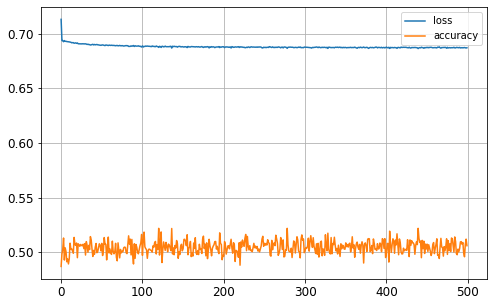

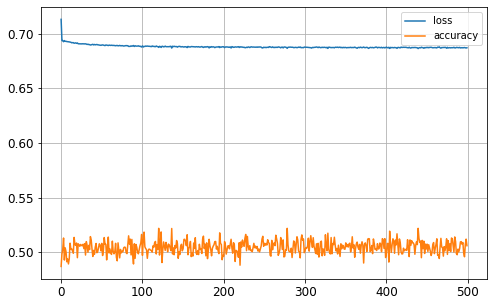

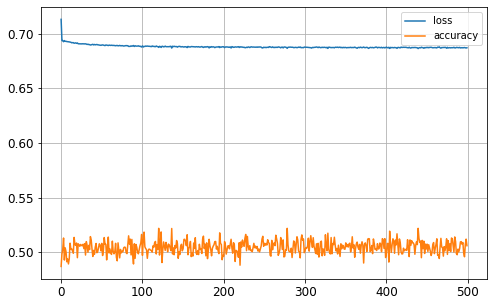

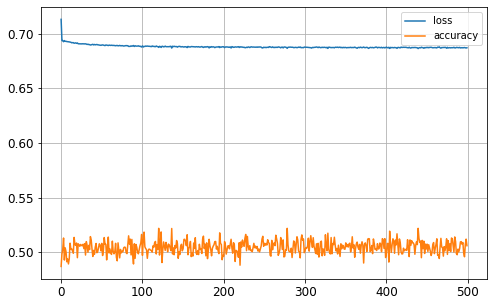

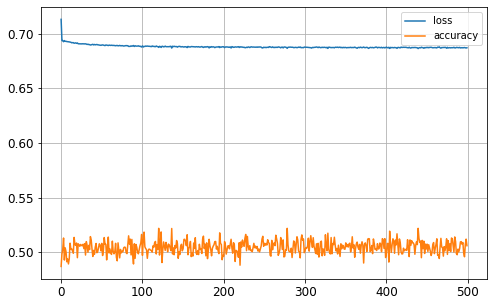

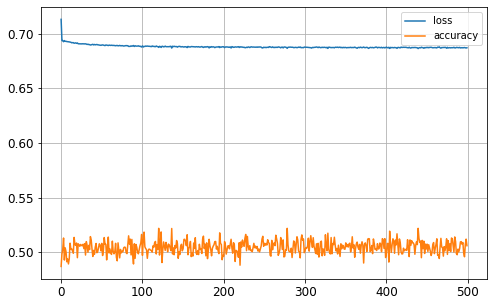

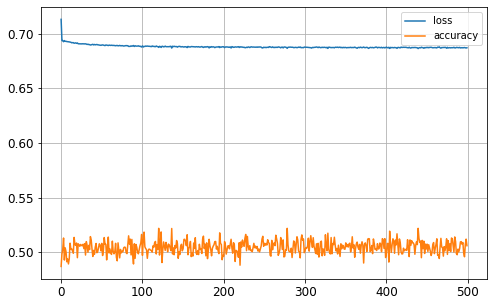

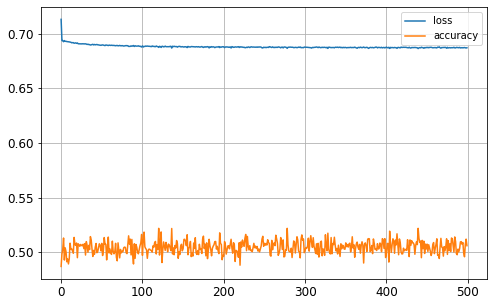

In [163]:
%%timeit
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Dense(30, input_dim=len(attributes), activation="sigmoid"))
# more hidden layer(s) could be added here
# model.add(keras.layers.Dense(6, activation="sigmoid"))
model.add(keras.layers.Dense(2, activation="softmax"))

model.compile(
    loss='binary_crossentropy',
    optimizer='sgd',
#    optimizer = keras.optimizers.SGD(lr=0.01, nesterov=True),
    metrics=['accuracy'])

history = model.fit(X, y, epochs=500, batch_size=32)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

In [165]:
#choose validation data to see whether there is overfitting
X_valid, X_train = X[:50], X[50:]
y_valid, y_train = y[:50], y[50:]

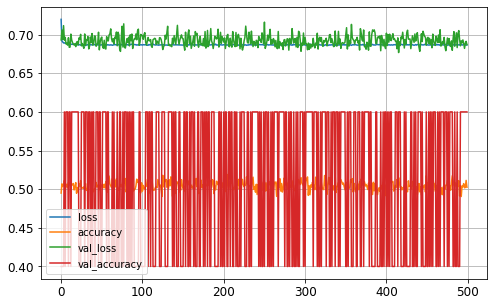

In [166]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


model = keras.models.Sequential()

model.add(keras.layers.Dense(30, input_dim=len(attributes), activation="sigmoid"))
#model.add(keras.layers.Dense(6, activation="sigmoid"))
model.add(keras.layers.Dense(2, activation="softmax"))

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
#    optimizer = keras.optimizers.SGD(lr=0.01, nesterov=True),
    metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    validation_data=(X_valid, y_valid),
                    epochs=500, batch_size=32, verbose=0)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

Evaulation on test data

In [167]:
X_testing = X_test[attributes].values
y_testing = keras.utils.to_categorical(y_test)

model.evaluate(X_testing, y_testing, verbose=0)

[0.687386356194814, 0.5086667]

<AxesSubplot:>

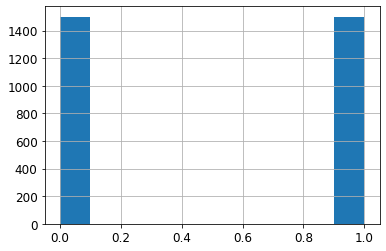

In [168]:
y_test.hist()

In [169]:
X_valid, X_train = X_testing, X
y_valid, y_train = y_testing, y

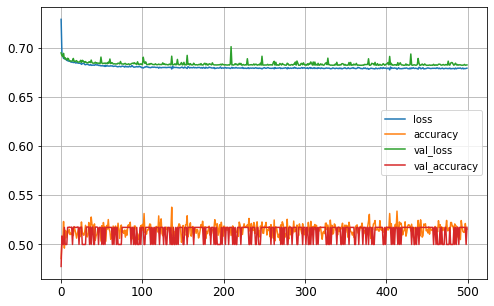

In [171]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


model = keras.models.Sequential()

model.add(keras.layers.Dense(30, input_dim=len(attributes), activation="sigmoid"))
#model.add(keras.layers.Dense(6, activation="sigmoid"))
model.add(keras.layers.Dense(2, activation="softmax"))

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
#    optimizer = keras.optimizers.SGD(lr=0.01, nesterov=True),
    metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    validation_data=(X_valid, y_valid),
                    epochs=500, batch_size=32, verbose=0)

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)

In [177]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                3150      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 62        
Total params: 3,212
Trainable params: 3,212
Non-trainable params: 0
_________________________________________________________________


Accuracy with Precision, Recall, F1, AUC

In [178]:
y_predict = model.predict(X_testing,verbose=0)
y_predict = (y_predict > 0.5).astype(int)
#if y_predict > 0.5, y_predict is "1"
print(y_predict)
#make sure the size of actual testing data equals to that of predition data
y_actual = np.reshape(y_testing,[-1])
print(y_actual)
y_prediction = np.reshape(y_predict,[-1])
print(y_prediction)

[[1 0]
 [1 0]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]
[0. 1. 0. ... 1. 0. 1.]
[1 0 1 ... 0 1 0]


In [179]:
precisionNN = precision_score(y_actual, y_prediction)
recallNN = recall_score(y_actual, y_prediction)
f1NN = f1_score(y_actual, y_prediction)
aucNN = roc_auc_score(y_actual, y_prediction)
accNN = accuracy_score(y_actual, y_prediction)

In [182]:
print("Precision on test data is: %f" %precisionNN)
print("Recall on test data is: %f" %recallNN)
print("F1-Score on test data is: %f" %f1NN)
print("Area under ROC on test data is: %f" %aucNN)
print("Accuracy on test data is: %f" %accNN)

Precision on test data is: 0.517333
Recall on test data is: 0.517333
F1-Score on test data is: 0.517333
Area under ROC on test data is: 0.517333
Accuracy on test data is: 0.517333


# Comparison of training time and accuracy results 

In [190]:
#using the series from pandas to form a dataframe of training time
traingingtimetable=pd.DataFrame.from_dict(
                  {'Training time(per loop)':pd.Series(['20.2 ms ± 2.06 ms', '10.5 ms ± 1.3 ms','13min 48s ± 1min 45s'], index=['Gaussian Naive Bayes','Multinomial Naive Bayes','Neural Network']),'Ranking':pd.Series(['2','1','3'], index=['Gaussian Naive Bayes','Multinomial Naive Bayes','Neural Network']),
                     }
                   )
traingingtimetable

,Training time(per loop),Ranking
Gaussian Naive Bayes,20.2 ms ± 2.06 ms,2
Multinomial Naive Bayes,10.5 ms ± 1.3 ms,1
Neural Network,13min 48s ± 1min 45s,3


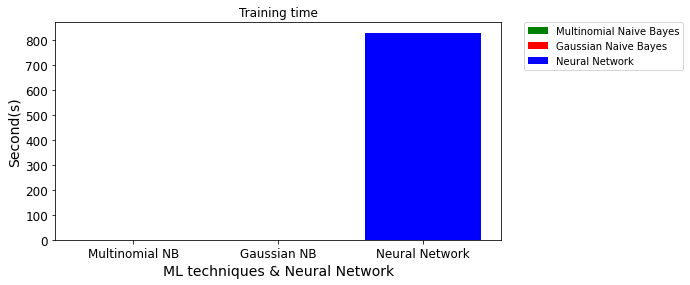

In [301]:
#comparison of training time for naive bayes classifier and neural network by using graphs made by matplotlib
#as the triaining time are composed by 'millisecond'and 'minute', so the "second" were calculated respectively in this step to draw the graph below.
x1 = ['Multinomial NB']
y1=[0.010513]
#10.5 ms ± 1.3 ms

x2 = ['Gaussian NB']
y2=[0.020221]
#20.2 ms ± 2.06 ms

x3 = ['Neural Network']
y3=[828]
#13min 48s ± 1min 45s

plt.bar(x1,y1,label ='Multinomial Naive Bayes', color='g')
plt.bar(x2,y2,label = 'Gaussian Naive Bayes', color='r')
plt.bar(x3,y3,label = 'Neural Network', color='b')

plt.xlabel('ML techniques & Neural Network')
plt.ylabel('Second(s)')
plt.title('Training time')

plt.legend()
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)

In [195]:
#using the series from pandas to form a dataframe of accuracy
accuracytable=pd.DataFrame.from_dict(
                  {'Accuracy':pd.Series([0.619000, 0.588667,0.517333], index=[]'Gaussian Naive Bayes','Multinomial Naive Bayes','Neural Network'),'Precision':pd.Series([0.814815,0.806452,0.517333], index=['Gaussian Naive Bayes','Multinomial Naive Bayes','Neural Network']),'Recall':pd.Series([0.308000, 0.233333,0.517333], index=['Gaussian Naive Bayes','Multinomial Naive Bayes','Neural Network']),'F1-Score':pd.Series([0.447025, 0.361944,0.517333], index=['Gaussian Naive Bayes','Multinomial Naive Bayes','Neural Network']),'Area under ROC':pd.Series([0.619000, 0.588667,0.517333], index=['Gaussian Naive Bayes','Multinomial Naive Bayes','Neural Network']),'Ranking(highest to lowest)':pd.Series(['1','2','3'], index=['Gaussian Naive Bayes','Multinomial Naive Bayes','Neural Network']),
                     }
                   )
accuracytable

,Accuracy,Precision,Recall,F1-Score,Area under ROC,Ranking(highest to lowest)
Gaussian Naive Bayes,0.619000,0.814815,0.308000,0.447025,0.619000,1
Multinomial Naive Bayes,0.588667,0.806452,0.233333,0.361944,0.588667,2
Neural Network,0.517333,0.517333,0.517333,0.517333,0.517333,3


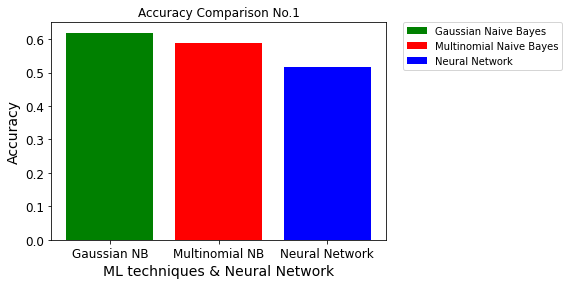

In [248]:
#comparison of accuracy for naive bayes classifier and neural network by using graphs made by matplotlib
x1 = ['Gaussian NB']
y1=[0.619000]

x2 = ['Multinomial NB']
y2=[0.588667]

x3 = ['Neural Network']
y3=[0.517333]

plt.bar(x1,y1,label ='Gaussian Naive Bayes', color='g')
plt.bar(x2,y2,label = 'Multinomial Naive Bayes', color='r')
plt.bar(x3,y3,label = 'Neural Network', color='b')

plt.xlabel('ML techniques & Neural Network')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison No.1')

plt.legend()
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)

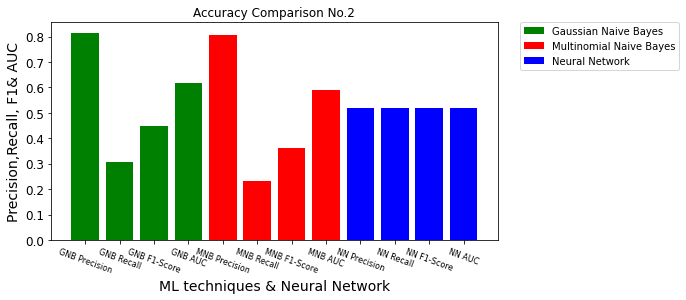

In [283]:
x1 = ['GNB Precision', 'GNB Recall', 'GNB F1-Score', 'GNB AUC']
y1=[0.814815, 0.308000, 0.447025, 0.619000]

x2 = ['MNB Precision','MNB Recall', 'MNB F1-Score', 'MNB AUC']
y2=[0.806452, 0.233333, 0.361944, 0.588667]

x3 = ['NN Precision','NN Recall', 'NN F1-Score', 'NN AUC']
y3=[0.517333, 0.517333, 0.517333, 0.517333]

plt.bar(x1,y1,label ='Gaussian Naive Bayes', color='g')
plt.bar(x2,y2,label = 'Multinomial Naive Bayes', color='r')
plt.bar(x3,y3,label = 'Neural Network', color='b')


plt.xlabel('ML techniques & Neural Network')
plt.ylabel('Precision,Recall, F1& AUC')
plt.title('Accuracy Comparison No.2')
plt.xticks(rotation=-20)  
plt.tick_params(axis='x', labelsize=8)

plt.legend()
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
